In [6]:
import os
import pandas as pd
from newsapi import NewsApiClient
import nltk
%matplotlib inline

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [8]:
# Read your api key environment variable
api_key = os.getenv("news_api")
api_key='c7825a5cbc5240d2a9245f8ec5ccc703'

In [9]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
bc_headlines = newsapi.get_everything(
    q="Bitcoin News Article", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bc_headlines['totalResults']}")

# Show sample article
bc_headlines["articles"][0]


Total articles about Bitcoin: 124


{'source': {'id': None, 'name': 'Bitcoin.com'},
 'author': None,
 'title': 'Satoshi Nakamoto Candidate Paul Le Roux to Start Bitcoin Mining Business After Prison Time | News - Bitcoin News',
 'description': 'A possible Satoshi Nakamoto, the mysterious creator of Bitcoin, has been sentenced to 25 years in prison. Criminal mastermind Paul Le Roux told the judge that upon his release he plans to "start a business selling and hosting bitcoin miners," claiming that hi…',
 'url': 'https://news.bitcoin.com/satoshi-nakamoto-paul-le-roux-start-bitcoin-mining-business/',
 'urlToImage': 'https://news.bitcoin.com/wp-content/uploads/2019/01/le-roux-bitcoin.jpg',
 'publishedAt': '2020-06-16T02:51:42Z',
 'content': 'A possible Satoshi Nakamoto, the mysterious creator of Bitcoin, has been sentenced to 25 years in prison. Criminal mastermind Paul Le Roux told the judge that upon his release he plans to “start a bu… [+4248 chars]'}

In [11]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="Ethereum News Article", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]


Total articles about Ethereum: 27


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Decentralized identity management platform Magic launches from stealth with $4M',
 'description': 'For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms. Magic, a small SF startup building a decentralized blockchain-based i…',
 'url': 'http://techcrunch.com/2020/06/03/decentralized-identity-management-platform-magic-launches-from-stealth-with-4m/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/Magic-Team-Photo-ETHDenver-2020.jpg?w=600',
 'publishedAt': '2020-06-03T22:55:42Z',
 'content': 'For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]'}

In [12]:
# Create the Bitcoin sentiment scores DataFrame
bc_sentiments = []

for article in bc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bc_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bc_df = pd.DataFrame(bc_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
bc_df = bc_df[cols]

bc_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.7783,0.000,0.196,0.804,"A possible Satoshi Nakamoto, the mysterious cr..."
1,0.0000,0.000,0.000,1.000,"Bitcoin approached $10,000 today, but fell sho..."
2,-0.1779,0.000,0.057,0.943,An Iranian lawmaker wants his countrys central...
3,-0.1027,0.057,0.070,0.872,"In October, Amazon had to discontinue an artif..."
4,0.0000,0.000,0.000,1.000,"Jack Dorsey, co-founder and CEO of payments co..."


In [13]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.00,1.000,For developers looking to quickly build identi...
1,0.6369,0.148,0.00,0.852,Ethereum is potentially just days away from br...
2,0.5267,0.115,0.00,0.885,Crypto assets have become a vivid example of t...
3,-0.1027,0.000,0.04,0.960,Ethereum continues to assert a bullish bias fo...
4,0.0000,0.000,0.00,1.000,ConsenSys is launching a new staking-as-a-serv...


In [14]:
# Describe the Bitcoin Sentiment
bc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.231940,0.07470,0.024850,0.900400
std,0.419145,0.06299,0.053198,0.061924
min,-0.778300,0.00000,0.000000,0.763000
25%,-0.025675,0.02775,0.000000,0.867000
50%,0.391850,0.07300,0.000000,0.914500
75%,0.489200,0.11425,0.010000,0.935500
max,0.807400,0.23700,0.196000,1.000000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.130745,0.042650,0.020850,0.936500
std,0.336365,0.053174,0.052232,0.074074
min,-0.690800,0.000000,0.000000,0.755000
25%,0.000000,0.000000,0.000000,0.884750
50%,0.000000,0.000000,0.000000,0.954000
75%,0.366350,0.075000,0.000000,1.000000
max,0.696900,0.148000,0.188000,1.000000


In [16]:
### Questions:

Q: Which coin had the highest mean positive score?

A: # Bitcoin has a higher mean positive score of almost 8%, while ethereum is about 4.5%.

Q: Which coin had the highest compound score?

A: # Bitcoin managed a high compound score of 80.74%, while Ethereum reached 69.69%.

Q. Which coin had the highest positive score?

A: # Bitcoin has the highest positive score of 23.7%, with Ethereum reaching 14.8%.

SyntaxError: invalid syntax (<ipython-input-16-118a7b481255>, line 5)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\codys\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Complete the tokenizer function
def tokenizer(article):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z0-9]")
    
    # Remove the punctuation
    re_clean = regex.sub(' ', article)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output


In [20]:
# Create a new tokens column for bitcoin
bc_df['Tokens'] = bc_df['Text'].apply(tokenizer)
bc_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,-0.7783,0.000,0.196,0.804,"A possible Satoshi Nakamoto, the mysterious cr...","[possible, satoshi, nakamoto, mysterious, crea..."
1,0.0000,0.000,0.000,1.000,"Bitcoin approached $10,000 today, but fell sho...","[bitcoin, approached, 10, 000, today, fell, sh..."
2,-0.1779,0.000,0.057,0.943,An Iranian lawmaker wants his countrys central...,"[iranian, lawmaker, want, country, central, ba..."
3,-0.1027,0.057,0.070,0.872,"In October, Amazon had to discontinue an artif...","[october, amazon, discontinue, artificial, int..."
4,0.0000,0.000,0.000,1.000,"Jack Dorsey, co-founder and CEO of payments co...","[jack, dorsey, co, founder, ceo, payment, comp..."


In [21]:
# Create a new tokens column for ethereum
eth_df['Tokens'] = eth_df['Text'].apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,0.0000,0.000,0.00,1.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
1,0.6369,0.148,0.00,0.852,Ethereum is potentially just days away from br...,"[ethereum, potentially, day, away, breaking, k..."
2,0.5267,0.115,0.00,0.885,Crypto assets have become a vivid example of t...,"[crypto, asset, become, vivid, example, statem..."
3,-0.1027,0.000,0.04,0.960,Ethereum continues to assert a bullish bias fo...,"[ethereum, continues, assert, bullish, bias, f..."
4,0.0000,0.000,0.00,1.000,ConsenSys is launching a new staking-as-a-serv...,"[consensys, launching, new, staking, service, ..."


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams


In [23]:
tokenizer(bc_df.Text.str.cat())[:10]

['possible',
 'satoshi',
 'nakamoto',
 'mysterious',
 'creator',
 'bitcoin',
 'ha',
 'sentenced',
 '25',
 'year']

In [24]:
# Generate the Bitcoin N-grams where N=2
processed1 = tokenizer(bc_df['Text'].str.cat())
word_counts1 = Counter(processed1)
bigram_counts1 = Counter(ngrams(processed1, n=2))
print(dict(bigram_counts1))


{('possible', 'satoshi'): 1, ('satoshi', 'nakamoto'): 1, ('nakamoto', 'mysterious'): 1, ('mysterious', 'creator'): 1, ('creator', 'bitcoin'): 1, ('bitcoin', 'ha'): 2, ('ha', 'sentenced'): 1, ('sentenced', '25'): 1, ('25', 'year'): 1, ('year', 'prison'): 1, ('prison', 'criminal'): 1, ('criminal', 'mastermind'): 1, ('mastermind', 'paul'): 1, ('paul', 'le'): 1, ('le', 'roux'): 3, ('roux', 'told'): 1, ('told', 'judge'): 1, ('judge', 'upon'): 1, ('upon', 'release'): 1, ('release', 'plan'): 1, ('plan', 'start'): 1, ('start', 'bu'): 1, ('bu', '4248'): 1, ('4248', 'char'): 1, ('char', 'bitcoin'): 2, ('bitcoin', 'approached'): 1, ('approached', '10'): 1, ('10', '000'): 3, ('000', 'today'): 1, ('today', 'fell'): 1, ('fell', 'short'): 1, ('short', 'key'): 1, ('key', 'level'): 2, ('level', 'photo'): 1, ('photo', 'chesnot'): 1, ('chesnot', 'getty'): 1, ('getty', 'images'): 4, ('images', 'getty'): 1, ('images', 'bitcoin'): 1, ('bitcoin', 'price'): 1, ('price', 'fluctuating'): 1, ('fluctuating', 'clo

In [25]:
# Generate the Ethereum N-grams where N=2
processed = tokenizer(eth_df['Text'].str.cat())
word_counts = Counter(processed)
bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))

{('developer', 'looking'): 2, ('looking', 'quickly'): 2, ('quickly', 'build'): 2, ('build', 'identity'): 2, ('identity', 'management'): 2, ('management', 'platform'): 2, ('platform', 'readily'): 2, ('readily', 'available'): 2, ('available', 'option'): 2, ('option', 'stray'): 2, ('stray', 'far'): 2, ('far', 'internet'): 2, ('internet', 'biggest'): 2, ('biggest', 'data'): 2, ('data', 'hungry'): 2, ('hungry', 'platform'): 2, ('platform', 'magic'): 2, ('magic', '2450'): 2, ('2450', 'char'): 2, ('char', 'ethereum'): 2, ('ethereum', 'potentially'): 1, ('potentially', 'day'): 1, ('day', 'away'): 1, ('away', 'breaking'): 1, ('breaking', 'key'): 1, ('key', 'level'): 1, ('level', 'resistance'): 2, ('resistance', 'bitcoin'): 1, ('bitcoin', 'trading'): 1, ('trading', 'pair'): 1, ('pair', 'world'): 1, ('world', 'second'): 1, ('second', 'largest'): 1, ('largest', 'cryptocurrency'): 1, ('cryptocurrency', 'ha'): 1, ('ha', 'made'): 1, ('made', 'significant'): 1, ('significant', '22'): 1, ('22', 'gain')

In [26]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Get the top 10 words for Bitcoin
tokens = (tokenizer(bc_df.Text.str.cat()))
bc10 = token_count(tokens, 10)
bc10

[('char', 20),
 ('bitcoin', 14),
 ('getty', 5),
 ('ha', 4),
 ('level', 4),
 ('images', 4),
 ('wa', 4),
 ('paul', 3),
 ('le', 3),
 ('roux', 3)]

In [28]:
# Get the top 10 words for Ethereum
tokens = (tokenizer(eth_df.Text.str.cat()))
eth10 = token_count(tokens, 10)
eth10

[('char', 20),
 ('platform', 5),
 ('blockchain', 5),
 ('company', 5),
 ('token', 5),
 ('developer', 4),
 ('consensys', 4),
 ('many', 4),
 ('project', 4),
 ('price', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [30]:
# Generate the Bitcoin word cloud
big_string = ' '.join(tokens)
input_text = tokenizer(big_string)
input_text[:10]

['developer',
 'looking',
 'quickly',
 'build',
 'identity',
 'management',
 'platform',
 'readily',
 'available',
 'option']

Text(0.5, 1.0, 'BitCoin Word Cloud')

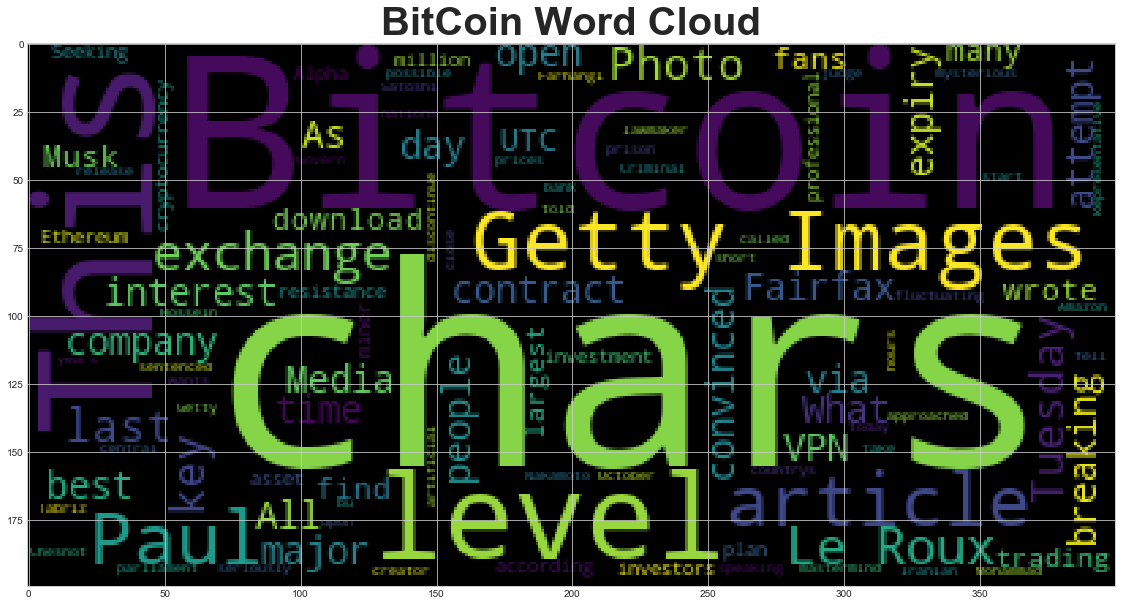

In [31]:
wc = WordCloud().generate(bc_df['Text'].str.cat())
plt.figure(figsize= (20,10))
plt.imshow(wc)
plt.title(label = "BitCoin Word Cloud", fontdict={'fontsize': 40, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

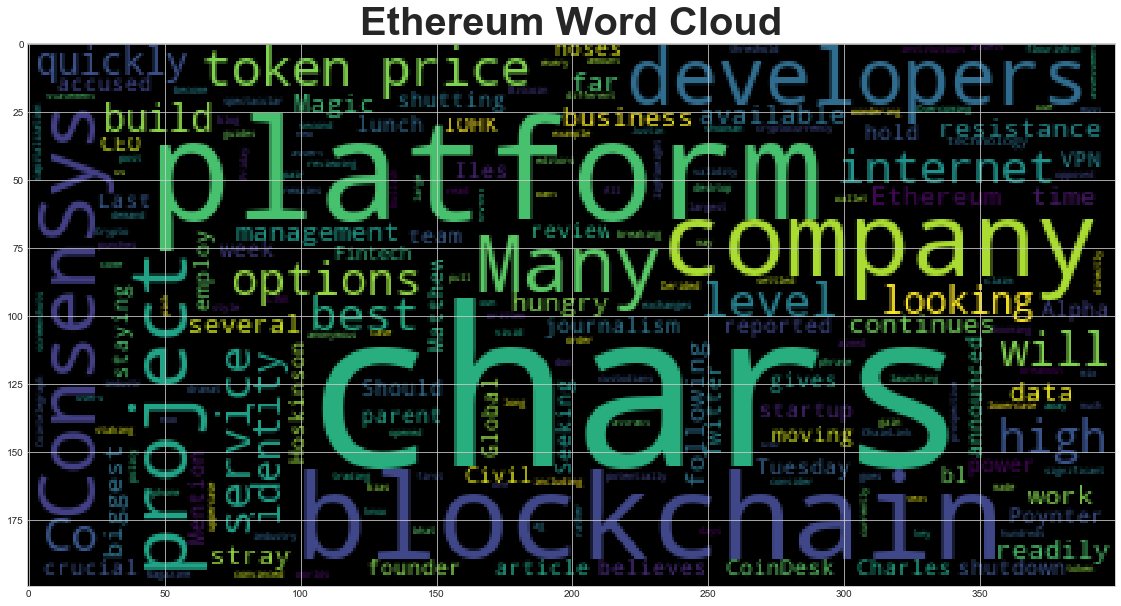

In [32]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_df['Text'].str.cat())
plt.figure(figsize= (20,10))
plt.imshow(wc)
plt.title(label = "Ethereum Word Cloud", fontdict={'fontsize': 40, 'fontweight':'bold'})

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy
import en_core_web_sm

In [34]:
# Optional - download a language model for SpaCy


In [35]:
# Load the spaCy model
#!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

ValueError: spacy.syntax.nn_parser.Parser size changed, may indicate binary incompatibility. Expected 72 from C header, got 64 from PyObject

## Bitcoin NER

In [31]:
# Concatenate all of the bitcoin text together
bc_concat = ' '.join(bc_df['Text'])

In [32]:
# Run the NER processor on all of the text
doc= nlp(bc_concat)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

NameError: name 'nlp' is not defined

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

NameError: name 'doc' is not defined

In [34]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

NameError: name 'doc' is not defined

---

## Ethereum NER

In [35]:
# Concatenate all of the bitcoin text together
eth_concat = ' '.join(eth_df['Text'])


In [36]:
# Run the NER processor on all of the text
doc= nlp(eth_concat)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

NameError: name 'nlp' is not defined

In [37]:
# Render the visualization
displacy.render(doc, style='ent')

NameError: name 'doc' is not defined

In [38]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

NameError: name 'doc' is not defined